In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Check if there are available GPU devices
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# data = pd.read_csv(r"D:\projects\Abstactive Text Summarization\archive\data.csv")

# Read the first 10,000 rows  beacuse its a amassive data
data = pd.read_csv(r"D:\projects\Abstactive Text Summarization\archive\data.csv", nrows=10000)

In [4]:
# Create a copy of the dataset to avoid modifying the original data
df = data.copy()

In [5]:
# Count of missing values per column
df.isnull().sum()

Unnamed: 0      0
ID            643
Content         0
Summary         0
Dataset         0
dtype: int64


In [6]:
# Delete rows where Content is NaN
df = df.dropna(subset=['Content'])

In [7]:
# Reset index after deletion
df.reset_index(drop=True, inplace=True)

In [8]:
print(df.isnull().sum())

Unnamed: 0      0
ID            643
Content         0
Summary         0
Dataset         0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   ID          9357 non-null   object
 2   Content     10000 non-null  object
 3   Summary     10000 non-null  object
 4   Dataset     10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [10]:
# Remove any duplicated rows to clean the data
df.drop_duplicates(inplace = True)

In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'Content', 'Summary', 'Dataset'], dtype='object')

In [12]:
df.head()

,Unnamed: 0,ID,Content,Summary,Dataset
0,0,f49ee725a0360aa6881ed1f7999cc531885dd06a,New York police are concerned drones could bec...,Police have investigated criminals who have ri...,CNN/Daily Mail
1,1,808fe317a53fbd3130c9b7563341a7eea6d15e94,By . Ryan Lipman . Perhaps Australian porn sta...,Porn star Angela White secretly filmed sex act...,CNN/Daily Mail
2,2,98fd67bd343e58bc4e275bbb5a4ea454ec827c0d,"This was, Sergio Garcia conceded, much like be...",American draws inspiration from fellow country...,CNN/Daily Mail
3,3,e12b5bd7056287049d9ec98e41dbb287bd19a981,An Ebola outbreak that began in Guinea four mo...,World Health Organisation: 635 infections and ...,CNN/Daily Mail
4,4,b83e8bcfcd51419849160e789b6658b21a9aedcd,By . Associated Press and Daily Mail Reporter ...,A sinkhole opened up at 5:15am this morning in...,CNN/Daily Mail


In [13]:
# Drop unnecessary columns
df = df.drop(["Unnamed: 0","ID","Dataset"],axis=1)

In [14]:
df.head()

,Content,Summary
0,New York police are concerned drones could bec...,Police have investigated criminals who have ri...
1,By . Ryan Lipman . Perhaps Australian porn sta...,Porn star Angela White secretly filmed sex act...
2,"This was, Sergio Garcia conceded, much like be...",American draws inspiration from fellow country...
3,An Ebola outbreak that began in Guinea four mo...,World Health Organisation: 635 infections and ...
4,By . Associated Press and Daily Mail Reporter ...,A sinkhole opened up at 5:15am this morning in...


In [15]:
import re
import unicodedata
import contractions
import logging
from nltk.corpus import stopwords

# Initialize logging to capture any warnings
logging.basicConfig(level=logging.WARNING)

# Load English stopwords from NLTK library
stop_words = set(stopwords.words('english'))

def text_cleaner(text, num):
    
    newString = text.lower()

    # Remove any content within parentheses 
    newString = re.sub(r'\([^)]*\)', '', newString)

    # Remove double quotes from the text
    newString = re.sub('"', '', newString)

    # Expand contractions 
    newString = contractions.fix(newString)

    # Remove possessive 's 
    newString = re.sub(r"'s\b", "", newString)

    # Normalize unicode characters to their closest ASCII equivalent
    newString = unicodedata.normalize('NFKD', newString).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove URLs 
    newString = re.sub(r'https?://\S+|www\.\S+', '', newString)

    # Remove non-alphabetical characters
    newString = re.sub("[^a-zA-Z]", " ", newString)

    # Normalize repeated characters
    newString = re.sub(r'(.)\1{2,}', r'\1\1', newString)

    # Remove newlines and excessive spaces
    newString = re.sub(r'\s+', ' ', newString).strip()

    # Split the text into tokens (words)
    tokens = newString.split()

    # remove stopwords from the tokens list
    if num == 0:
        tokens = [w for w in tokens if w not in stop_words]

    # Keep words with more than one character, but keep "a" and "i"
    long_words = [w for w in tokens if len(w) > 1 or w in ['a', 'i']]

    # Return the cleaned text as a space-separated string
    return ' '.join(long_words)


In [16]:
 # Clean the text using the 'text_cleaner' function and append the cleaned text to the list
cleaned_text = []
for t in df['Content']:
    cleaned_text.append(text_cleaner(t,0))

In [17]:
cleaned_text[:5]

['new york police concerned drones could become tools terrorists investigating ways stop potential attacks police acknowledged drones potential weapon nypd said technology advanced enough someone could use carry air assault using chemical weapons firearms police want develop technology allow take control drones well scan skies major events nypd says drones carrying explosives number one threat investigate ways stop attacks deputy chief salvatore dipace left concerned incident last year drone landed front german chancellor angela merkel could took chancellor people drone flown packed football stadium manchester england week ago resulting suspected pilot arrested consulting military members counterterrorism bomb squad emergency services aviation units working plan counter weaponized drones nypd received intelligence indicating imminent threat become increasingly concerned last year deputy chief salvatore dipace told cbs news looked people jury rigged drones carry guns carry different typ

In [18]:
 # Clean the summary using the 'text_cleaner' function and append the cleaned summary to the list
cleaned_summary = []
for t in df['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [19]:
cleaned_summary[:10]

['police have investigated criminals who have rigged guns to drones and are working with the military to develop technology to stop attacks incidents involving drones have drastically increased in new york city last year a drone was landed in front of german chancellor angela merkel',
 'porn star angela white secretly filmed sex acts with a partner in a university library the university was unaware of the video and has been left outraged police say white and onscreen partner could have faced charges if caught in the act the video was published online but has since been removed white dutch production company has issued an apology',
 'american draws inspiration from fellow countryman in open bid fowler closed a six shot lead in holes on saturday sergio garcia admits rory mcilroy will be hard to catch',
 'world health organisation infections and deaths since outbreak began in guinea in february and has spread to sierra leone and liberia deadliest outbreak since ebola first emerged in cent

In [20]:
# Assign the cleaned content to a new column called 'cleaned_text'
df['cleaned_text'] = cleaned_text

# Assign the cleaned summaries to a new column called 'cleaned_summary'
df['cleaned_summary'] = cleaned_summary

In [21]:
# Replace any empty strings in the DataFrame with NaN (missing values)
df.replace('', np.nan, inplace=True)

# Drop all rows where any column contains a NaN value (i.e., remove incomplete data)
df.dropna(axis=0, inplace=True)

In [22]:
df.head()

,Content,Summary,cleaned_text,cleaned_summary
0,New York police are concerned drones could bec...,Police have investigated criminals who have ri...,new york police concerned drones could become ...,police have investigated criminals who have ri...
1,By . Ryan Lipman . Perhaps Australian porn sta...,Porn star Angela White secretly filmed sex act...,ryan lipman perhaps australian porn star angel...,porn star angela white secretly filmed sex act...
2,"This was, Sergio Garcia conceded, much like be...",American draws inspiration from fellow country...,sergio garcia conceded much like hunted tiger ...,american draws inspiration from fellow country...
3,An Ebola outbreak that began in Guinea four mo...,World Health Organisation: 635 infections and ...,ebola outbreak began guinea four months ago tu...,world health organisation infections and death...
4,By . Associated Press and Daily Mail Reporter ...,A sinkhole opened up at 5:15am this morning in...,associated press daily mail reporter published...,a sinkhole opened up at am this morning in dun...


In [23]:
# Create a new DataFrame with only the cleaned_text and cleaned_summary columns
new_df = df[['cleaned_text', 'cleaned_summary']]

new_df.columns = ['text', 'summary']

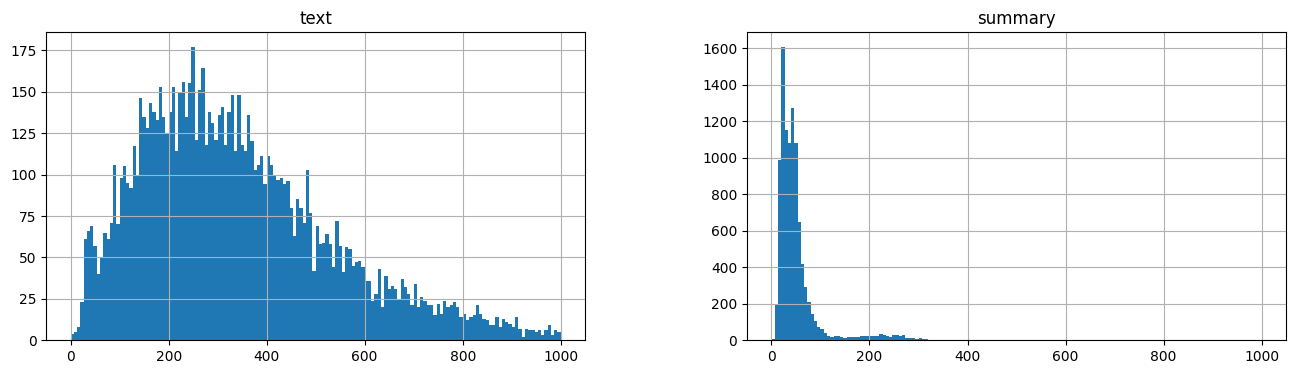

In [24]:
# Plot histograms to visualize the distribution of word counts
# This helps in understanding how long most of the texts and summaries are
# Useful for setting max length limits for input and output during training
text_count = [len(sentence.split()) for sentence in new_df.text]
headlines_count = [len(sentence.split()) for sentence in new_df.summary]

pd.DataFrame({
    'text': text_count,
    'summary': headlines_count
}).hist(bins=150, figsize=(16, 4), range=[0, 1000])

plt.show()

In [25]:
# percentage of length of words
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of summary have 0-220 words
print(get_word_percent(new_df.summary, 230))

# Check how many % of text have 0-1000 words
print(get_word_percent(new_df.text, 1000))

0.97
0.98


In [26]:
# Set maximum sequence lengths based on distribution analysis
max_text_len=1000
max_summary_len=230

In [27]:
cleaned_text = np.array(new_df['text'])
cleaned_summary = np.array(new_df['summary'])

text = []
summary = []

# Filter out texts and summaries that exceed maximum length constraints
for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len and 100 <= len(cleaned_text[i].split()) <= max_text_len):
        text.append(cleaned_text[i])
        summary.append(cleaned_summary[i])

new_df = pd.DataFrame({'text':text,'summary':summary})


In [28]:
# Add special tokens to the beginning and end of each summary
new_df['summary'] = new_df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [29]:
# Split the dataset into training and validation sets (90% train, 10% validation)
x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(new_df['text']), 
    np.array(new_df['summary']), 
    test_size=0.1, 
    random_state=0, 
    shuffle=True
)

In [30]:
# Initialize a tokenizer for the input text
# The tokenizer will learn the word-to-index mapping based on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [31]:
thresh = 20# Frequency threshold to consider a word as rare

cnt = 0        # Number of rare words (appeared less than threshold)
tot_cnt = 0    # Total number of unique words
freq = 0       # Total frequency of rare words
tot_freq = 0   # Total frequency of all words

# Loop through word counts in tokenizer
for key, value in x_tokenizer.word_counts.items():
    tot_cnt += 1
    tot_freq += value
    if value < thresh:
        cnt += 1
        freq += value

# Print percentage of rare words in vocabulary
print("% of rare words in vocabulary:", (cnt / tot_cnt) * 100)

# Print how much those rare words contribute to total word frequency
print("Total Coverage of rare words:", (freq / tot_freq) * 100)


% of rare words in vocabulary: 82.77104888932477
Total Coverage of rare words: 9.080201257826557


In [46]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc = x_tokenizer.num_words + 1

In [47]:
x_voc

14055

In [48]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [53]:
thresh=5

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.49722943115663
Total Coverage of rare words: 9.03223267346216


In [54]:
#prepare a tokenizer for summaries on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc = y_tokenizer.num_words + 1

In [55]:
# Check how many times the special token 'sostok' appears, and total training samples
y_tokenizer.word_counts['sostok'],len(y_tr)

(7980, 7980)

In [56]:
# deleting the rows that contain only **START** and **END** tokens

ind=[]

for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [57]:
ind=[]

for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)